In [1]:
# Import modules
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
final = pd.read_csv('../../data/test_new_clean.csv', index_col=0)
train = pd.read_csv('../../data/train_new_clean.csv', index_col=0)


In [68]:
qual = pd.read_csv('../../data/test_qual.csv', index_col=0)
trainqual = pd.read_csv('../../data/train_qual.csv', index_col=0)

In [3]:
final['Age'] = 2019 - final['YearBuilt']
final_cont = final[['LotArea','Age','GarageArea']]
final_categ = final.drop(['LotArea','Age','GarageArea'],axis=1)

In [4]:
train['Age'] = 2019 - train['YearBuilt']
train_cont = train[['LotArea','Age','GarageArea']]

In [5]:
# boxcox and normalize dataframes with sklearn.stats
def make_boxed_normal(df):
    new_dict = {}
    logs = []
    devs = []
    means = []
    cols = df.columns
    for name in cols: 
        key = 'norm_' + name
        arr = np.array(df[name]) + 1
        arr, log_num = stats.boxcox(arr)
        upper = arr.max()
        lower = arr.min()
        
        value = (arr-np.mean(arr))/(np.std(arr))
        print (arr)
        new_dict[key] = value
        logs.append(log_num)
        devs.append(np.std(arr))
        means.append(np.mean(arr))
        
    return pd.DataFrame(new_dict), logs, devs, means

In [6]:
train_norm, logs,devs,means = make_boxed_normal(train_cont)

# train['Age'] = stats.boxcox(train['Age'])
# train['Age'] - np.mean(train['Age'])/np.std(train['Age'])

[88.32617998 93.03819184 99.23752262 ... 90.79709231 93.4980551
 94.35378746]
[3.97523754 5.99422629 4.18950346 ... 7.47162493 7.15000575 6.53450247]
[209.96117017 181.89033576 228.62249473 ... 110.97405951 106.6101954
 119.59024754]


In [7]:
train_categ = train.drop(['LotArea','Age','GarageArea','SalePrice'],axis=1)

In [8]:
#We will pass into here the test data + log_list with lambdas from training data

def normalize_test(df, mean_arr, std_arr, log_list):
    new_dict = {}
    cols = df.columns
    i = 0
    for name in cols: 
        key = 'test_norm_' + name
        arr = np.array(df[name]) + 1 
        tempnum = log_list[i]
        print(tempnum)
        arr = stats.boxcox(arr, lmbda = tempnum)
        upper = arr.max()
        lower = arr.min()
        value = (arr-mean_arr[i])/(std_arr[i])
        print('Iter=',i)
        new_dict[key] = value
        i += 1
     
    return pd.DataFrame(new_dict)

In [9]:
final_norm = normalize_test(final_cont,means,devs,logs)

0.3963395009370394
Iter= 0
0.2269539177007964
Iter= 1
0.8163915780807791
Iter= 2


In [10]:
#FUNCTION TO LOG & TRANSFORM GrLivArea
def make_log(df):
    new_dict = {}
    cols = df.columns
    for name in cols: 
        key = 'log_' + name
        arr = np.array(df[name])
        log_arr = np.log(arr+1)
        value = (log_arr - log_arr.mean())/ log_arr.std()
        new_dict[key] = value
     
    return pd.DataFrame(new_dict)

# temp = make_log(train[['GrLivArea']])

# temp.iloc[0].isnull().sum()

In [11]:
final_norm.reset_index(drop=True, inplace=True)
final_categ.reset_index(drop=True, inplace=True)
final_combo = pd.concat([final_norm,final_categ],axis=1)

final_templog = make_log(final[['GrLivArea']])


print (final_templog)
##Transforming the GrLivArea in Final-Test Data Set with LOG:
x = final['GrLivArea'] 
mnGrLivArea = np.log(train.GrLivArea).mean()
stdGrLivArea = np.log(train.GrLivArea).std()
final_combo['LogLivArea'] = final_templog

      log_GrLivArea
0         -1.767651
1          0.651410
2          0.840314
3          0.597225
4         -0.341172
5         -0.157230
6          0.495300
7         -0.477335
8          0.310807
9         -0.108514
10         0.805364
11        -1.513844
12        -1.248554
13         0.300167
14        -1.949500
15         0.745311
16        -0.339471
17         0.074887
18         0.135173
19         2.204768
20         1.249398
21        -0.607731
22        -0.742957
23        -1.087759
24        -0.086806
25        -0.036335
26         0.899319
27        -0.254166
28        -0.961973
29         1.299063
...             ...
1429      -2.646185
1430      -0.184334
1431      -2.308774
1432      -0.603968
1433      -1.653056
1434       1.694970
1435       1.582089
1436       0.819619
1437      -0.142993
1438      -0.431158
1439       0.042747
1440       0.986952
1441       1.083650
1442       1.662644
1443       1.649122
1444      -0.245950
1445       1.039772
1446      -0.782907


In [11]:
train_norm.reset_index(drop=True, inplace=True)
train_categ.reset_index(drop=True, inplace=True)
train_combo = pd.concat([train_norm,train_categ],axis=1)
train_templog = make_log(train[['GrLivArea']])

#Transforming the GrLivArea in Training Data Set with LOG:
y = train['GrLivArea'] 
mnGrLivArea = np.log(train.GrLivArea).mean()
stdGrLivArea = np.log(train.GrLivArea).std()
train_combo['LogLivArea'] = train_templog

In [13]:
multi = linear_model.LinearRegression()
train_price, train_logs, train_devs, train_means = make_boxed_normal(train[['SalePrice']]-37800)
multi.fit(X=train_combo, y=train_price)

[102.88252769  97.83021699 105.44490873 ... 112.0494597   89.06318741
  90.38673086]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
pricepredict = multi.predict(final_combo)

pricepredict

array([[-0.90546469],
       [ 0.03604376],
       [ 0.60867263],
       ...,
       [ 0.40759754],
       [-0.82897134],
       [ 0.44835968]])

In [15]:
#To transform these predictions back to price
#logs, devs, means = 1,2,3 of the object 
train_price
train_logs
train_devs
train_means
#You multiply by the standard deviation, add back the mean.
#And then un-BoxCox it using the hyperparamter





[94.95626602505818]

In [16]:
print (pricepredict)

pricepredict = (pricepredict * train_devs[0])+train_means[0]
lmbda = train_logs
adjprice = scipy.special.inv_boxcox(pricepredict, lmbda[0])

[[-0.90546469]
 [ 0.03604376]
 [ 0.60867263]
 ...
 [ 0.40759754]
 [-0.82897134]
 [ 0.44835968]]


In [17]:
adjprice

array([[ 78245.85009646],
       [132243.28815782],
       [175829.36811108],
       ...,
       [159504.73438753],
       [ 81901.64787459],
       [162722.24867242]])

In [18]:
adjprice.mean()+37800

178425.6475120138

In [19]:
train[['SalePrice']].mean()

SalePrice    180423.080028
dtype: float64

In [20]:
type(adjprice)

numpy.ndarray

In [21]:
adjpricedf = pd.DataFrame(adjprice)

In [22]:
adjpricedf.to_csv('../../data/prediction1.csv')

In [23]:
len(final_combo)

1459

In [24]:
final_combo.index.values

array([   0,    1,    2, ..., 1456, 1457, 1458])

In [43]:
testID = pd.read_csv('../../data/test.csv', index_col=0)

In [26]:
len(testID)

1459

In [27]:
len(final)

1459

In [44]:
testID.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [52]:
testID = testID.assign(SalePrice=adjprice)
supsimple = testID.filter(['Id','SalePrice'])

In [53]:
supsimple.to_csv('../../data/submission1.csv')

In [54]:
len(supsimple)

1459

In [55]:
supsimple.head(3)

,SalePrice
Id,
1461,78245.850096
1462,132243.288158
1463,175829.368111


In [113]:
final_combo['OverallQual'] = qual.values  #test quality
train_combo['OverallQual'] = trainqual.values


# print (len(trainqual))
# print (len(train_combo['OverallQual']))

In [114]:
# np.isnan(trainqual)
train_combo.OverallQual.isnull().sum()

train_combo.loc[train_combo['OverallQual'].isnull()]

,norm_LotArea,norm_Age,norm_GarageArea,BsmtFullBath,KitchenAbvGr,GarageType,Kitchen,Fireplace,ExterQ,BsmtQ,HeatingQ,n_toilets,LogLivArea,OverallQual


In [115]:
from sklearn.linear_model import Ridge

train_x = train_combo.iloc[0:700]
test_x = train_combo.iloc[700:1400]

# Split the targets into training/testing sets
train_y = train_price.iloc[0:700]
test_y = train_price.iloc[700:1400]
train_combo.isnull().sum()


norm_LotArea       0
norm_Age           0
norm_GarageArea    0
BsmtFullBath       0
KitchenAbvGr       0
GarageType         0
Kitchen            0
Fireplace          0
ExterQ             0
BsmtQ              0
HeatingQ           0
n_toilets          0
LogLivArea         0
OverallQual        0
dtype: int64

Text(0,0.5,'$R^2$')

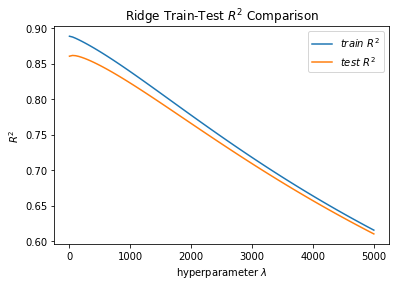

In [116]:
# create a ridge regression instance
ridge = Ridge()

ridge_scores_train = []
ridge_scores_test = []

alphas = np.linspace(0, 5000, 100)

for alpha in alphas:
    ridge.set_params(alpha=alpha,normalize=False)
    ridge.fit(train_x, train_y)
    ridge_scores_train.append(ridge.score(train_x, train_y))
    ridge_scores_test.append(ridge.score(test_x, test_y))
    
ridge_scores_train = np.array(ridge_scores_train)
ridge_scores_test = np.array(ridge_scores_test)

plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')

plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')


/Users/marchasson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/marchasson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/marchasson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0,0.5,'$R^2$')

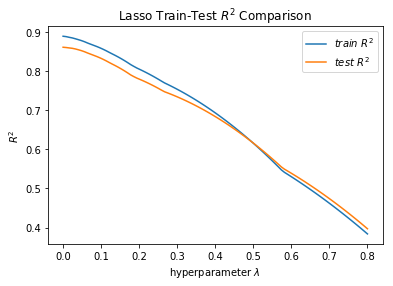

In [128]:
# create a lasso regression instance
from sklearn.linear_model import Lasso
lasso = Lasso()

lasso_scores_train = []
lasso_scores_test = []
coefs_lasso = []
intercepts_lasso = []

alphas = np.linspace(0, 0.8, 100)

for alpha in alphas:
    lasso.set_params(alpha=alpha,normalize=False)
    lasso.fit(train_x, train_y)
    lasso_scores_train.append(lasso.score(train_x, train_y))
    lasso_scores_test.append(lasso.score(test_x, test_y))
    coefs_lasso.append(lasso.coef_)
    intercepts_lasso.append(lasso.intercept_)
        
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = train_x.columns)  




lasso_scores_train = np.array(lasso_scores_train)
lasso_scores_test = np.array(lasso_scores_test)

plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Lasso Train-Test $R^2$ Comparison')

plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')



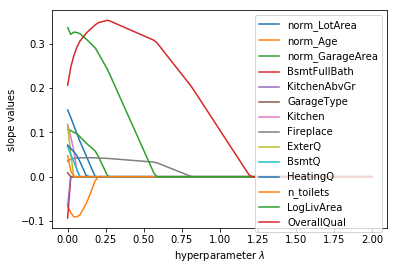

In [127]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

plt.legend()   

Our unpenalized models are performing better - suggesting we may need to add back some features.  We revisit our correlation matrix to see which features may make sense to add back.

In [121]:
#Re-train with Overall Quality
multi = linear_model.LinearRegression()
train_price, train_logs, train_devs, train_means = make_boxed_normal(train[['SalePrice']]-37800)
multi.fit(X=train_combo, y=train_price)

[102.88252769  97.83021699 105.44490873 ... 112.0494597   89.06318741
  90.38673086]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
pricepredict2 = multi.predict(final_combo) #with Quality

In [123]:
pricepredict2 = (pricepredict2 * train_devs[0])+train_means[0]
lmbda = train_logs
adjprice = scipy.special.inv_boxcox(pricepredict2, lmbda[0])

In [124]:
testID2 = testID.assign(SalePrice=adjprice)
supsimple = testID.filter(['Id','SalePrice'])
supsimple.to_csv('../../data/submission3.csv')